**Where is this data set from?**

- The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. This dataset is a subset of the larger report, which includes data from various sources such as the Gallup World Poll and other national surveys. The data was extracted from the World Happiness Report and made available for public use. However, the original data was collected by various researchers and organizations as part of their ongoing efforts to measure and understand happiness and well-being around the world.

    We use observed data on the six variables and estimates of their associations with life evaluations to explain the variation across countries. They include GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption. Our happiness rankings are not based on any index of these six factors – the scores are instead based on individuals’ own assessments of their lives, in particular, their answers to the single-item Cantril ladder life-evaluation question, much as epidemiologists estimate the extent to which life expectancy is affected by factors such as smoking, exercise, and diet

Detailed information about each of the Predictors:

1. **Log GDP per capita** is in terms of Purchasing Power Parity (PPP) adjusted to a constant 2017 international dollars, taken from the World Development Indicators (WDI) by the World Bank (version 17, metadata last updated on January 22, 2023). See Statistical Appendix 1 for more details. GDP data for 2022 are not yet available, so we extend the GDP time series from 2021 to 2022 using country-specific forecasts of real GDP growth from the OECD Economic Outlook No. 112 (November 2022) or, if missing, from the World Bank’s Global Economic Prospects (last updated: January 10, 2023), after adjustment for population growth. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.

2. The time series for **Healthy life expectancy at birth** is constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, 2016, and 2019. To match this report’s sample period (2005-2022), interpolation and extrapolation are used. See Statistical Appendix 1 for more details.

3. **Social support** (0-1) is the national average of the binary responses (0=no, 1=yes) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

4. **Freedom to make life choices** (0-1) is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

5. **Generosity** is the residual of regressing the national average of GWP responses to the donation question “Have you donated money to a charity in the past month?” on log GDP per capita.

6. **Perceptions of corruption** (0-1) are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption perception measure.

7. **Positive affect** is defined as the average of previous-day effects measures for laughter, enjoyment, and interest. The inclusion of interest (first added for World Happiness Report 2022), gives us three components in each of positive and negative affect, and slightly improves the equation fit in column 4. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday?

8. **Negative affect** is defined as the average of previous-day effects measures for worry, sadness, and anger.

9. **Life ladder**: Life evaluations from the Gallup World Poll provide the basis for the annual happiness rankings. They are based on answers to the main life evaluation question. The Cantril ladder asks respondents to think of a ladder, with the **best possible life for them being a 10 and the worst possible life being a 0**. They are then asked to rate their own current lives **on a 0 to 10 scale**. The rankings are from nationally representative samples over three years.

10. **Confidence in National Government**: The "Confidence in National Government" variable in the World Happiness Report is calculated based on the following question asked in the Gallup World Poll:

    "Do you have confidence in the national government?"

    Respondents are given the following options to choose from:

    "Yes, always"
    
    "Yes, sometimes"
    
    "No, rarely"

    "No, never"

    "Don't know"

    **The variable is calculated as the percentage of respondents who answer "Yes, always" or "Yes, sometimes" to this question.**

    This variable is one of several social factors that are included in the calculation of the World Happiness Report's overall happiness score for each country. The report combines data on social factors such as income, social support, life expectancy, freedom to make life choices, generosity, and perceptions of corruption to arrive at a comprehensive measure of happiness.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# scripts de soporte
# -------------------------------------------------
from src.tolookandcompare import to_doc_info, to_doc_headtail, transform_info, transform_headtail

from src.soporte_eda import resumen_df

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [2]:
from src.tolookandcompare import transform_headtail, transform_info

In [3]:
from src import soporte_eda as sp_eda

In [4]:
df = pd.read_csv ('files/World_Happiness_Report_limpio_sin_imputar.csv', dtype={'Country Name': 'object'})

df.head(2)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Social Support (%),Social Support (Yes/No),Freedom To Make Life Choices (%),Freedom To Make Life Choices (Yes/No),Perceptions Of Corruption (%),Perceptions Of Corruption (Yes/No),Positive Affect (%),Positive Affect (Yes/No),Negative Affect (%),Negative Affect (Yes/No)
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,45.1,No,71.8,Yes,88.2,Yes,41.4,No,25.8,No
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,55.2,Yes,67.9,Yes,85.0,Yes,48.1,No,23.7,No


In [5]:
df.sample(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Social Support (%),Social Support (Yes/No),Freedom To Make Life Choices (%),Freedom To Make Life Choices (Yes/No),Perceptions Of Corruption (%),Perceptions Of Corruption (Yes/No),Positive Affect (%),Positive Affect (Yes/No),Negative Affect (%),Negative Affect (Yes/No)
1879,Syria,NaN,2009,4.978971,8.656476,0.842402,66.860001,0.748259,0.078969,0.687760,0.490969,0.292455,NaN,84.2,Yes,74.8,Yes,68.8,Yes,49.1,No,29.2,No
362,Chad,Sub-Saharan Africa,2019,4.250799,7.353720,0.640452,52.000000,0.537246,0.054407,0.832283,0.556211,0.460061,0.571986,64.0,Yes,53.7,Yes,83.2,Yes,55.6,Yes,46.0,No
475,Cuba,NaN,2006,5.417869,NaN,0.969595,68.000000,0.281458,NaN,NaN,0.596187,0.276602,0.513176,97.0,Yes,28.1,No,NaN,Data not available,59.6,Yes,27.7,No
1272,Mexico,Latin America and Caribbean,2017,6.410299,9.905107,0.799839,65.800003,0.861405,-0.205978,0.800893,0.775285,0.230991,0.256953,80.0,Yes,86.1,Yes,80.1,Yes,77.5,Yes,23.1,No
579,El Salvador,Latin America and Caribbean,2008,5.191494,8.918751,0.747411,64.760002,0.635648,-0.081519,0.734727,0.827382,0.232124,0.377637,74.7,Yes,63.6,Yes,73.5,Yes,82.7,Yes,23.2,No
1996,Turkmenistan,Commonwealth of Independent States,2009,6.567713,8.955209,0.923846,59.779999,NaN,-0.102010,NaN,0.695308,0.151584,NaN,92.4,Yes,NaN,Data not available,NaN,Data not available,69.5,Yes,15.2,No
972,Japan,East Asia,2015,5.879684,10.606649,0.922657,73.599998,0.831694,-0.160576,0.654443,0.702269,0.176409,0.352867,92.3,Yes,83.2,Yes,65.4,Yes,70.2,Yes,17.6,No
803,Hong Kong S.A.R. of China,East Asia,2020,5.295341,10.931117,0.812943,NaN,0.705452,-0.074210,0.380351,0.521671,0.210314,0.442211,81.3,Yes,70.5,Yes,38.0,No,52.2,Yes,21.0,No
1015,Kenya,Sub-Saharan Africa,2007,4.575658,8.200930,0.841112,51.939999,0.749842,0.042770,0.798739,0.698050,0.161941,0.658626,84.1,Yes,75.0,Yes,79.9,Yes,69.8,Yes,16.2,No
444,Costa Rica,Latin America and Caribbean,2007,7.432132,9.671674,0.917678,68.720001,0.922736,0.091504,0.819655,0.825872,0.240080,0.445800,91.8,Yes,92.3,Yes,82.0,Yes,82.6,Yes,24.0,No


In [6]:
transform_headtail(df, 'Country Name')

Valores únicos: 165
Número de registros: 2199
Valores nulos: 0
Registros duplicados: 2034
dtype: object
---------------------------------
Country Name
Argentina     0.77
Costa Rica    0.77
Brazil        0.77
Bolivia       0.77
Bangladesh    0.77
Name: proportion, dtype: float64
Country Name
Cuba        0.05
Maldives    0.05
Guyana      0.05
Oman        0.05
Suriname    0.05
Name: proportion, dtype: float64
---------------------------------
Media: nan
Mediana: nan
Moda: nan


In [7]:
transform_headtail(df, 'Generosity')

Valores únicos: 2126
Número de registros: 2199
Valores nulos: 73
Registros duplicados: 73
dtype: float64
---------------------------------
Generosity
 NaN         3.32
-0.069513    0.05
 0.167652    0.05
 0.190809    0.05
 0.121316    0.05
Name: proportion, dtype: float64
Generosity
-0.144077    0.05
-0.134858    0.05
-0.132990    0.05
-0.129371    0.05
-0.018664    0.05
Name: proportion, dtype: float64
---------------------------------
Media: 0.00
Mediana: -0.02
Moda: -0.33752656


In [8]:
transform_headtail(df, 'Confidence In National Government')

Valores únicos: 1838
Número de registros: 2199
Valores nulos: 361
Registros duplicados: 361
dtype: float64
---------------------------------
Confidence In National Government
NaN         16.42
0.611545     0.05
0.299357     0.05
0.307386     0.05
0.435440     0.05
Name: proportion, dtype: float64
Confidence In National Government
0.387677    0.05
0.344929    0.05
0.263297    0.05
0.267581    0.05
0.612072    0.05
Name: proportion, dtype: float64
---------------------------------
Media: 0.48
Mediana: 0.47
Moda: 0.06876874


In [9]:
sp_eda.resumen_df(df)


Forma del DataFrame: (2199, 23)

Tipos de datos:
Country Name                             float64
Regional Indicator                        object
Year                                       int64
Life Ladder                              float64
Log GDP Per Capita                       float64
Social Support                           float64
Healthy Life Expectancy At Birth         float64
Freedom To Make Life Choices             float64
Generosity                               float64
Perceptions Of Corruption                float64
Positive Affect                          float64
Negative Affect                          float64
Confidence In National Government        float64
Social Support (%)                       float64
Social Support (Yes/No)                   object
Freedom To Make Life Choices (%)         float64
Freedom To Make Life Choices (Yes/No)     object
Perceptions Of Corruption (%)            float64
Perceptions Of Corruption (Yes/No)        object
Positive Affect (%)

,count,mean,std,min,25%,50%,75%,max
Country Name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2199.0,2014.161437,4.718736,2005.000000,2010.000000,2014.000000,2018.000000,2022.000000
Life Ladder,2199.0,5.479226,1.125529,1.281271,4.646750,5.432437,6.309460,8.018934
Log GDP Per Capita,2179.0,9.389766,1.153387,5.526723,8.499764,9.498955,10.373216,11.663788
Social Support,2186.0,0.810679,0.120952,0.228217,0.746609,0.835535,0.904792,0.987343
Healthy Life Expectancy At Birth,2145.0,63.294583,6.901104,6.720000,59.119999,65.050003,68.500000,74.474998
Freedom To Make Life Choices,2166.0,0.747858,0.140150,0.257534,0.656528,0.769821,0.859382,0.985178
Generosity,2126.0,0.000096,0.161083,-0.337527,-0.112116,-0.022671,0.092070,0.702708
Perceptions Of Corruption,2083.0,0.745195,0.185837,0.035198,0.688139,0.799654,0.868827,0.983276
Positive Affect,2175.0,0.652143,0.105922,0.178886,0.571684,0.663063,0.737936,0.883586



Resumen estadístico (categóricas):


,count,unique,top,freq
Regional Indicator,2087,10,Sub-Saharan Africa,443
Social Support (Yes/No),2199,3,Yes,2147
Freedom To Make Life Choices (Yes/No),2199,3,Yes,2036
Perceptions Of Corruption (Yes/No),2199,3,Yes,1830
Positive Affect (Yes/No),2199,3,Yes,1997
Negative Affect (Yes/No),2199,3,No,2154


In [10]:
df['Country Name'].dtype

dtype('float64')

In [11]:
df['Country Name']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2194   NaN
2195   NaN
2196   NaN
2197   NaN
2198   NaN
Name: Country Name, Length: 2199, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country Name                           0 non-null      float64
 1   Regional Indicator                     2087 non-null   object 
 2   Year                                   2199 non-null   int64  
 3   Life Ladder                            2199 non-null   float64
 4   Log GDP Per Capita                     2179 non-null   float64
 5   Social Support                         2186 non-null   float64
 6   Healthy Life Expectancy At Birth       2145 non-null   float64
 7   Freedom To Make Life Choices           2166 non-null   float64
 8   Generosity                             2126 non-null   float64
 9   Perceptions Of Corruption              2083 non-null   float64
 10  Positive Affect                        2175 non-null   float64
 11  Nega

____

In [13]:
df['Country Name'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Country Name, dtype: float64

In [14]:
df['Country Name'].unique()

array([nan])

In [15]:
df['Country Name'].value_counts()

Series([], Name: count, dtype: int64)

Insights: 

- Hay que pasar la columna 'Country' de float a objeto. Gran número de nulos por este motivo. 

- Social Support Según la información inicial es el promedio nacional de las respuestas binarias (0=no, 1=sí) pero los datos son continuos de 0 a 1 

- Freedom To Make Life Choices Según la información inicial es el promedio nacional de las respuestas binarias a la pregunta de la GWP "¿Está satisfecho o insatisfecho con su libertad para elegir qué hacer con su vida?"

- Perceptions Of Corruption son el promedio de las respuestas binarias a dos preguntas del GWP: "¿Está extendida la corrupción en el gobierno o no?" y "¿Está extendida la corrupción en las empresas o no?". Cuando faltan datos sobre corrupción gubernamental, se utiliza la percepción de corrupción empresarial como medida general de percepción de corrupción.

- Confidence In National Government Los encuestados pueden elegir entre las siguientes opciones:

    "Sí, siempre"

    "Sí, a veces"

    "No, rara vez"

    "No, nunca"

    "No sé"

    La variable se calcula como el porcentaje de encuestados que responden "Sí, siempre" o "Sí, a veces" a esta pregunta.

____

# Life Ladder (variable principal!)

Tipo: Numérica continua; representa el índice de felicidad (escala 0-10). 

Uso en **EDA&Dashboard**: Distribución, ranking más y menos felices, evolución felicidad en el tiempo.


In [16]:
df['Life Ladder'].value_counts()

Life Ladder
3.723590    1
4.401778    1
4.758381    1
3.831719    1
3.782938    1
           ..
3.616480    1
2.693523    1
3.159802    1
3.154578    1
3.296220    1
Name: count, Length: 2199, dtype: int64

In [17]:
nulos_life_ladder = df['Life Ladder'].isnull().sum()
print(f"Número de valores nulos en 'Life Ladder': {nulos_life_ladder}")

Número de valores nulos en 'Life Ladder': 0


In [18]:
# Promedio felicidad de todos los años y países contabilizados, juntos (problema: Si hay países con más datos - más años- recabados, al hacer la media, el resultado se desvirtúa, porque pesan todos igual)

life_ladder_mean = df["Life Ladder"].mean()

print(f"Felicidad promedio (Life Ladder): {life_ladder_mean:.2f}")

Felicidad promedio (Life Ladder): 5.48


In [19]:
# De este modo, se calcula una vez el promedio por país, y después se vuelve a calcular el promedio global, con esos datos (más fidedigno).

df.groupby("Country Name")["Life Ladder"].mean().mean()

nan

In [20]:
# Promedio felicidad global por año: ¿Cómo cambia la felicidad GLOBAL en el tiempo?

df.groupby("Year")["Life Ladder"].mean()

Year
2005    6.446164
2006    5.196935
2007    5.418291
2008    5.418554
2009    5.457640
2010    5.496782
2011    5.424088
2012    5.443612
2013    5.393302
2014    5.386267
2015    5.400948
2016    5.396381
2017    5.460421
2018    5.498683
2019    5.570995
2020    5.727539
2021    5.636193
2022    5.585126
Name: Life Ladder, dtype: float64

In [21]:
# Promedio por país (con todos los datos por año del país): ¿Cómo de felices son los distintos paises en general?
df.groupby("Country Name")["Life Ladder"].mean()

Series([], Name: Life Ladder, dtype: float64)

In [22]:
promedio_pais = df.groupby("Country Name")["Life Ladder"].mean()

pais_mas_feliz = promedio_pais.idxmax()
valor_mas_feliz = promedio_pais.max()

print(f"País más feliz a lo largo de los años: {pais_mas_feliz} ({valor_mas_feliz:.2f})")

ValueError: attempt to get argmax of an empty sequence

In [ ]:
pais_menos_feliz = promedio_pais.idxmin()
valor_menos_feliz = promedio_pais.min()

print(f'País menos feliz a lo largo de los años: {pais_menos_feliz} ({valor_menos_feliz:.2f})')


País menos feliz a lo largo de los años: Afghanistan (3.35)


In [ ]:
# País más feliz por año
pais_mas_feliz_por_ano = (df.loc[df.groupby("Year")["Life Ladder"].idxmax()].sort_values("Year"))

pais_mas_feliz_por_ano[["Year", "Country Name", "Life Ladder"]]

,Year,Country Name,Life Ladder
505,2005,Denmark,8.018934
623,2006,Finland,7.672449
506,2007,Denmark,7.834233
507,2008,Denmark,7.970892
508,2009,Denmark,7.683359
509,2010,Denmark,7.770515
510,2011,Denmark,7.788232
1868,2012,Switzerland,7.776209
334,2013,Canada,7.593794
513,2014,Denmark,7.507559


In [ ]:
# País menoss feliz por año
pais_menos_feliz_por_ano = (df.loc[df.groupby("Year")["Life Ladder"].idxmin()].sort_values("Year"))

pais_menos_feliz_por_ano[["Year", "Country Name", "Life Ladder"]]

,Year,Country Name,Life Ladder
1980,2005,Turkiye,4.718734
1950,2006,Togo,3.202429
2183,2007,Zimbabwe,3.280247
1951,2008,Togo,2.807855
1919,2009,Tanzania,3.407508
1920,2010,Tanzania,3.229129
1952,2011,Togo,2.936221
1882,2012,Syria,3.164491
1883,2013,Syria,2.687553
1953,2014,Togo,2.838959


In [ ]:
pais_mas_feliz_por_ano = (df.loc[df.groupby("Year")["Life Ladder"].idxmax()].set_index("Year")["Life Ladder"].sort_index())

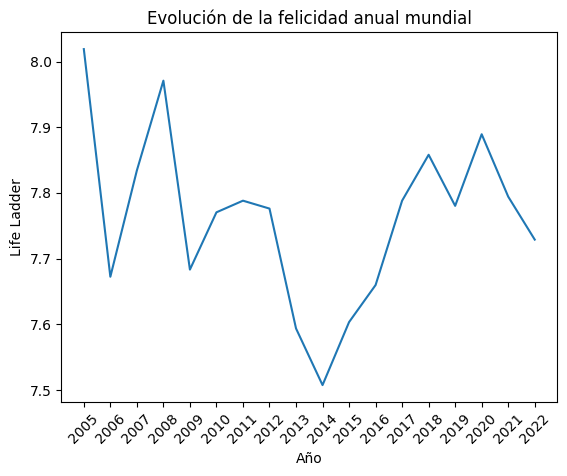

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    pais_mas_feliz_por_ano.index,
    pais_mas_feliz_por_ano.values
)

plt.xlabel("Año")
plt.ylabel("Life Ladder")
plt.title("Evolución de la felicidad anual mundial")

# Forzar ticks anuales correctos
plt.xticks(pais_mas_feliz_por_ano.index, rotation=45)

plt.show()

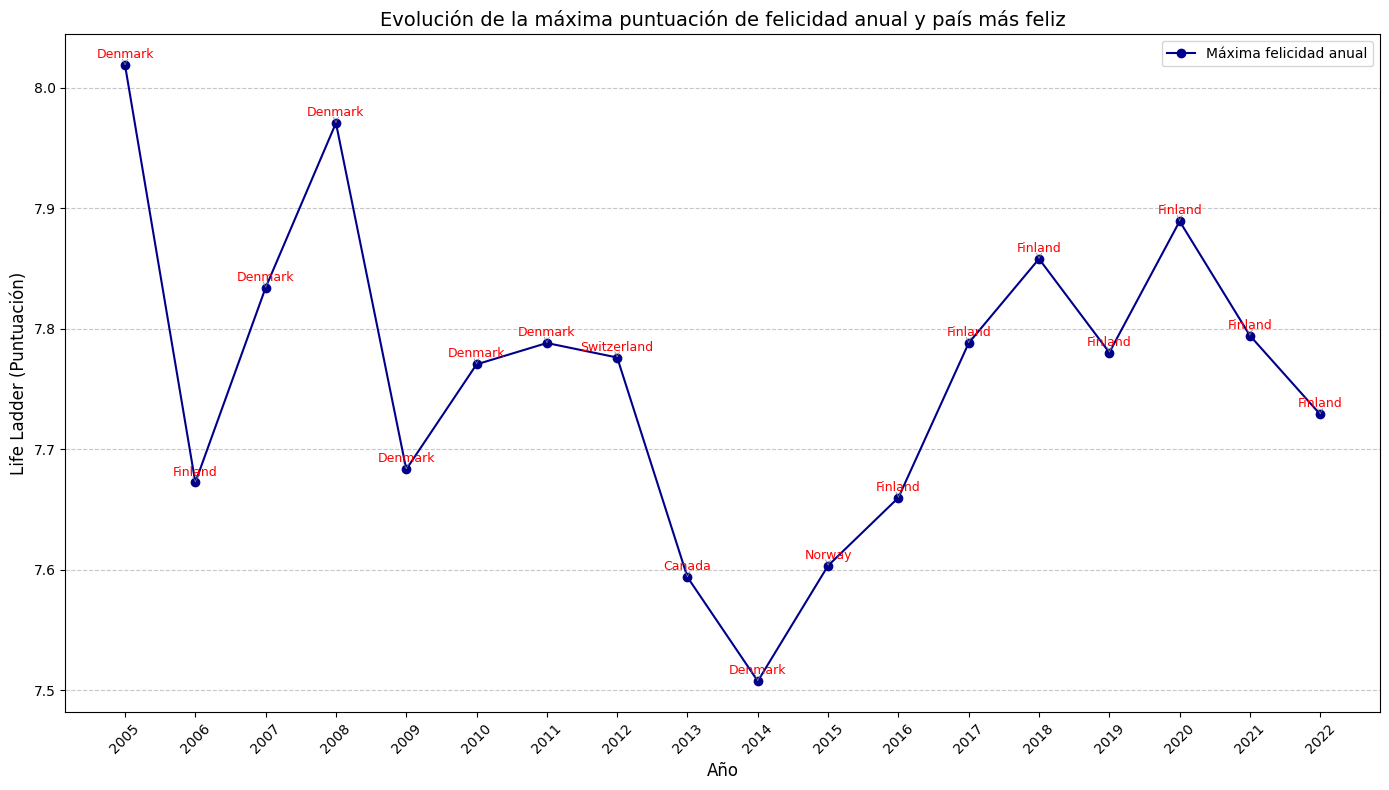

In [ ]:
# Identificar el índice de la fila con el máximo "Life Ladder" por cada "Year"
idx_max_felicidad_anual = df.groupby("Year")["Life Ladder"].idxmax()

# df con los datos del país más feliz para cada año
df_mas_felices = df.loc[idx_max_felicidad_anual].sort_values("Year")

plt.figure(figsize=(14, 8))

# línea de la felicidad máxima anual
plt.plot(
    df_mas_felices["Year"],
    df_mas_felices["Life Ladder"],
    marker='o',              # Muestra un círculo en cada punto
    linestyle='-',           # Une los puntos con una línea
    color='darkblue',
    label='Máxima felicidad anual'
)

for index, row in df_mas_felices.iterrows():
    
    # La función plt.annotate() se usa para añadir texto en coordenadas específicas.
    plt.annotate(
        # El texto a mostrar: el nombre del país
        text=row["Country Name"],  
        
        # Las coordenadas del punto: (Año, Puntuación Life Ladder)
        xy=(row["Year"], row["Life Ladder"]),  
        
        # Desplazamiento del texto respecto al punto (0 en X, 5 puntos arriba en Y)
        xytext=(0, 5),  
        
        textcoords='offset points',
        ha='center',             # Alineación horizontal: centrado sobre el punto
        fontsize=9,
        color='red',
        arrowprops={
            'arrowstyle': '->',  # Tipo de flecha
            'connectionstyle': 'arc3,rad=0.0',
            'color': 'gray',
            'lw': 0.5           # Grosor de la línea
        }
    )

plt.xlabel("Año", fontsize=12)
plt.ylabel("Life Ladder (Puntuación)", fontsize=12)
plt.title("Evolución de la máxima puntuación de felicidad anual y país más feliz", fontsize=14)

# Forzamos los ticks del eje X para que muestren exactamente los años de los datos
plt.xticks(df_mas_felices["Year"], rotation=45) 

plt.grid(axis='y', linestyle='--', alpha=0.7) # rejilla horizontal
plt.legend()
plt.tight_layout() # Ajusta automáticamente el gráfico para evitar que se solapen los elementos
plt.show()

____